# Data exploration and cleaning; business questions
1. How should products be classified into different categories to simplify reports and analysis?
2. What is the distribution of product prices across different categories?
3. How many products are being discounted?
4. How big are the offered discounts as a percentage of the product prices?
5. How do seasonality and special dates (Christmas, Black Friday) affect sales?
6. How could data collection be improved?
7. How many orders are there?
8. How many products are there?
9. What period of time do these orders comprise?
10. How many orders are Completed?
11. How should revenue be computed?

In [1]:
# import modules

# remove FutureWarnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# import pandas
import pandas as pd

# import regex module
import re

# import matplotlib for plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# options
pd.options.display.max_colwidth = 100

In [6]:
# import data

brands      = pd.read_csv('cleaned_data/brands_clean.csv')
orders      = pd.read_csv('cleaned_data/orders_clean.csv', parse_dates=['created_date'])
orders_full = pd.read_csv('cleaned_data/orders_full_clean.csv', parse_dates=['created_date'])
orderlines  = pd.read_csv('cleaned_data/orderlines_clean.csv', parse_dates=['date'])
products    = pd.read_csv('cleaned_data/products_clean.csv')

FileNotFoundError: ignored

## Questions

1. How should products be classified into different categories to simplify reports and analysis?

In [ ]:
# group by words in description (regex)
categories = {
    'Repair, Second hand and Services' : [1,999999, r'\bifixit\b|\blike/new\b|\breconditioned\b|\brefurbished\b|\brepair\b|\breplacement\b|\bscrewdriver\b|\bsecond hand\b|\bspatula\b|\bsphygmomanometer\b|\btoolkit\b|\btools\b'],
    'Accessories'                      : [1,2000, r'\badobe\b|\badapter\b|\bbank\b|\bbattery\b|\bbracket\b|\bbutton\b|\bcar\b|\bcharger\b|\bcharging\b|\bclock\b|\bdock\b|\bdvd\b|\bfan\b|\bhub\b|\bmicrosoft\b|\bpower\b|\bremote control\b|\bscale\b|\bsensor\b|\bsoftware\b|\bstand\b|\btablet\b|\bthermo*\b|\busb\b|\bwatch\b|\bweather\b'],
    'Alarms and Security'              : [1,300, r'\balarm\b|\blocator\b|\bradar\b|\bsecurity\b|\bsurveillance\b'],
    'Audio equipment'                  : [1,800, r'\bheadphones\b|\bheadset\b|\bmicrophone\b|\bmusic\b|\bplayer\b|\bspeaker\b'],
    'Lighting'                         : [1,600, r'\bbulb\b|\bhue\b|\blamp\b|\blights\b|\bphilips\b'],
    'Peripherals'                      : [1,10000, r'\bamplifier\b|\bcable\b|\bd-link\b|\bhdmi\b|\bkeyboard\b|\bkeypad\b|\bmonitor\b|\bmouse\b|\bpen\b|\bprinter\b|\brouter\b|\bscanner\b|\bscreen\b|\bstylus\b|\bswitch\b|\b802.11\b'],
    'Storage'                          : [1,13455, r'\bSSD\b|\bTB\b|\bGB\b|\bWD\b|\bwestern digital\b|\bdatatraveler\b|\bddr\b|\bdimm\b|\bexternal disk\b|\bflash drive\b|\bhard drive\b|\bdisk\b|\bthunderbolt\b|\bmemory card\b|\bnas\b|\bpen drive\b|\bpen-drive\b|\bpendrive\b|\bqnap\b|\braid\b|\bram\b|\bsshd\b|\bsynology\b'],
    'Wearables and Toys'               : [1,800, r'\barmband\b|\bbackpack\b|\bbelt\b|\bbracelet\b|\bcontroller\b|\bdrone\b|\bgopro\b|\bpointer\b|\brobot\b|\bsports\b|\bsticker\b|\bstrip\b|\bwork out\b'],
    'Apple accessories'                : [1,407, r'\bcase\b|\bcasing\b|\bcover\b|\bhousing\b|\biphone\b|\bfolio\b|\bpouch\b|\bprotect*\b|\bresistant\b|\bshell\b|\bshield\b|\bsleeve\b|\bsupport\b'],
    'Desktops and Laptops'             : [1,999999, r'\bdesktop\b|\blaptop\b|\bnotebook\b|\bimac\b|\bipad\b|\bmacbook\b|\bpc\b'],
    'iPhone'                           : [408,2000, r'\biphone\b']
}

patterns = dict()
for category, pat_price in categories.items():
    patterns[category] = re.compile(pat_price[2], re.IGNORECASE)


def categorize(desc, price, categories, patterns):
    cat_keys = categories.keys()
    for category in cat_keys:
        min_price = categories[category][0]
        max_price = categories[category][1]
        match     = re.search(patterns[category], desc)
        if match and (price < max_price):
            return category + ' - ' + match.group(0)
    return 'Missing'


products['category'] = products.apply(lambda row: categorize(row['desc'], row['price'], categories, patterns), axis=1)

NameError: ignored

In [ ]:
products['category'], products['match'] = products['category'].str.split(' - ', expand=True)[0], products['category'].str.split(' - ', expand=True)[1]

In [ ]:
print(products[['desc', 'match', 'category']].sample(20).to_string(index=False))

                                                                                                desc          match                          category
                                  Headphones and Dolby intelligent voice system for iPhone and iPod.     Headphones                   Audio equipment
                                     IMac desktop computer 27 inch 5K Retina 64GB SSD 512GB RAM PCle            SSD                           Storage
                    Reconditioned Protector for MacBook Pro 13-inch sleek and sturdy easy to install  Reconditioned  Repair, Second hand and Services
                            Refurbished Apple Watch 38mm Series 3 with GPS altimeter and submersible    Refurbished  Repair, Second hand and Services
            Adapter anchoring safety key and compact design for MacBook model 11 inches to 15 inches        Adapter                       Accessories
                         MiniDrone remote control with LEDs and video to iPhone iPad and iPod Touch.

In [ ]:
for category in categories:
    print()
    # print(products.loc[products['category'] == category, ['desc', 'match', 'category', 'price']].sample(10).to_string(index=False))
    print(products.loc[products['category'] == category, ['desc', 'match', 'category', 'price']].nlargest(10, 'price').to_string(index=False))

NameError: ignored

Repair, Second hand and Services - 0.12 %
Accessories - 0.11 %
Alarms and Security - 5.08 %
Audio equipment - 1.76 %
Lighting - 17.86 %
Peripherals - 1.02 %
Storage - 0.37 %
Wearables and Toys - 5.41 %
Apple accessories - 0.66 %
Desktops and Laptops - 3.61 %
iPhone - 11.11 %


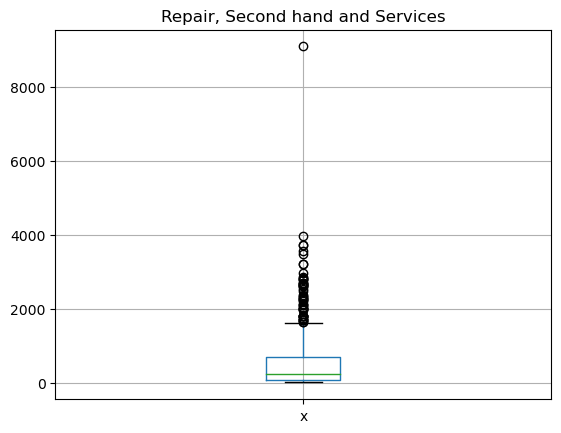

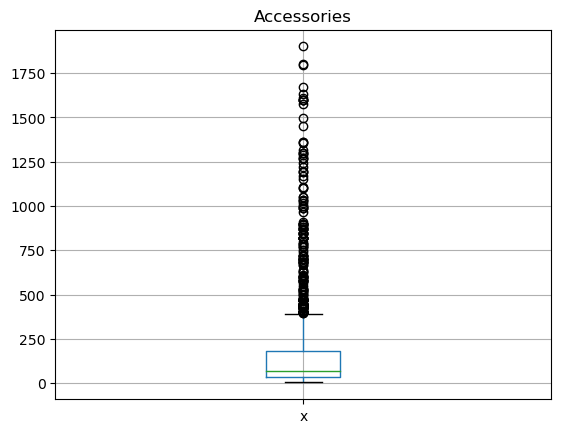

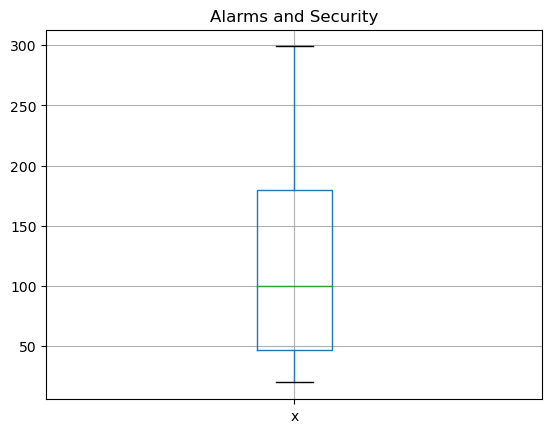

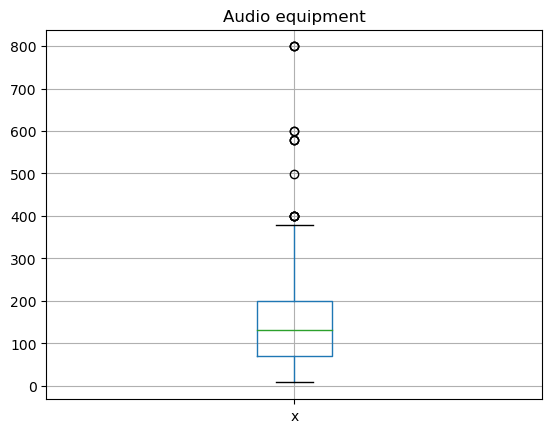

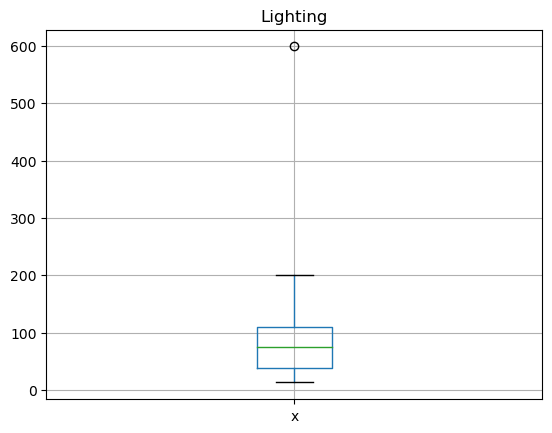

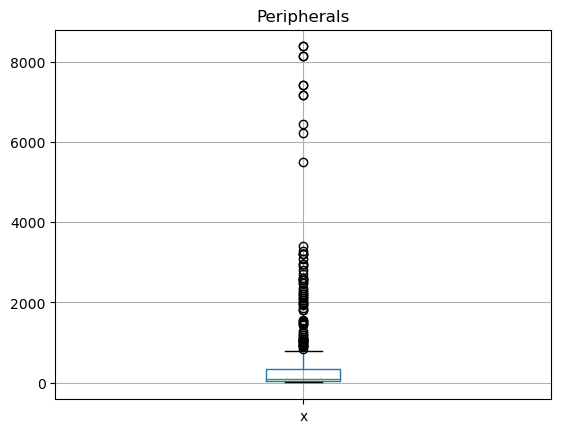

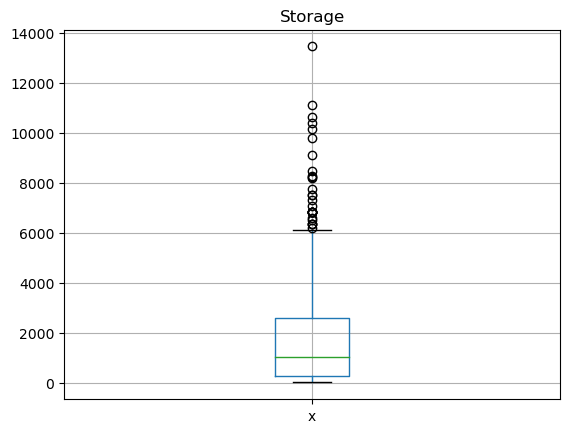

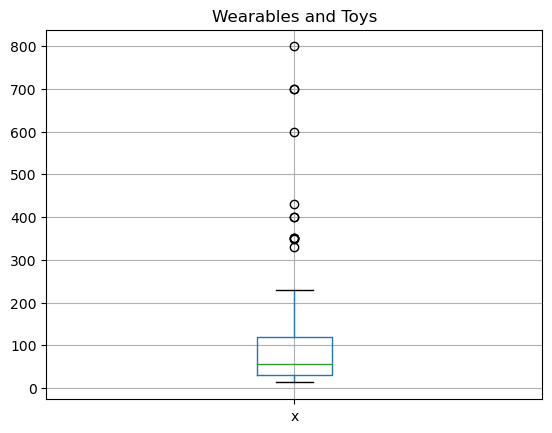

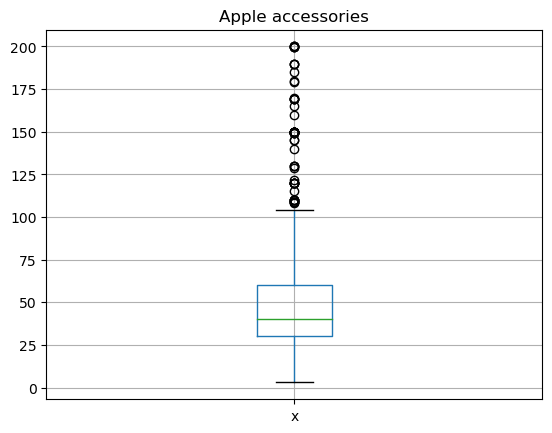

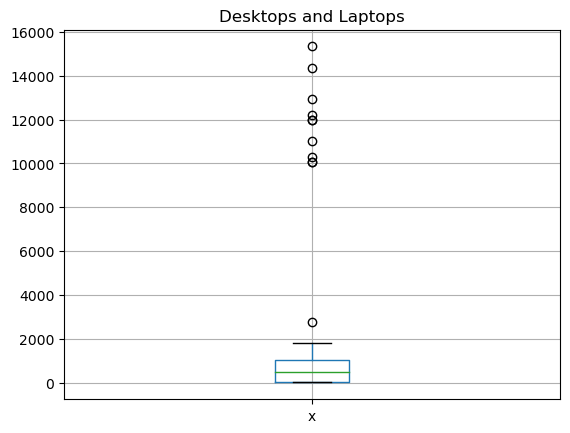

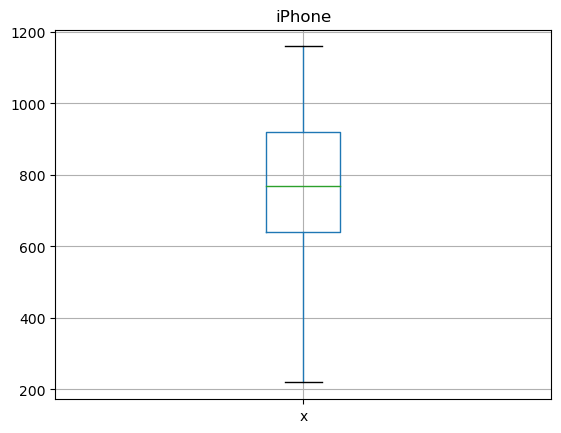

In [ ]:
def get_category_stats(dataframe, categories, alpha=0.25):
    outliers = dict()
    percentages = dict()
    for category in categories:
        data  = products.loc[products['category'] == category, 'price']
        # Q1
        q_low = data.quantile(alpha)
        # Q3
        q_hi  = data.quantile(1-alpha)
        # IQR
        iqr = q_hi - q_low
        cut_min = q_low - 1.5*iqr
        cut_max = q_hi + 1.5*iqr

        plt.figure()
        _, bp = pd.DataFrame.boxplot(data, return_type='both')
        plt.title(category)

        current = data.loc[(data < cut_min) | (data > cut_max)].index
        outliers[category] = current
        percentages[category] = 100*len(outliers)/data.shape[0]

    return outliers, percentages


outliers, percentages = get_category_stats(products, categories, 0.25)

# print(outliers)
for cat in categories:
    # print(products.iloc[outliers[cat]])
    print(f'{cat} - {percentages[cat]:.2f} %')

In [ ]:
# print(products[products['category'].str.contains('Light')].nlargest(10, 'price'))
# print(products[products['category'].str.contains('Wear')].nlargest(10, 'price'))
print(products[products['category'].str.contains('iPhone')].nsmallest(10, 'price'))

            sku                                             name  \
108     AP20055           Like new - Apple iPhone 5S 16GB Silver   
109     AP20057       Like new - Apple iPhone 5s 16GB Space Gray   
204     AP20190               Open - Apple iPhone 5S 16GB Silver   
270     AP20267             Like New - iPhone 5s 16GB Space Gray   
1138  APP1964-A              Open - Apple iPhone 32GB Space Gray   
1142  APP1966-A               Open - Apple iPhone 32GB Rose Gold   
1570    APP2446                   Apple iPhone 6 32GB Space Gray   
757   APP1471-A              Open - Apple iPhone 16GB Space Gray   
1193    APP2024  Open - Apple iPhone 5s 16GB Space Gray - As new   
1206    APP2038    Open - Apple iPhone 16 GB Oro Rosa - like new   

                                                    desc   price  in_stock  \
108      IPhone 5S refitted and ready to use 16GB Silver  409.00         0   
109   iPhone 5S 16GB state as new and completely revised  409.00         0   
204      Apple iP

In [ ]:
print(products['category'].value_counts())
print(f'sum of all categorized products: {products["category"].value_counts().sum()}')
print(f'sum of all products: {products.shape[0]}')
print()

Storage                              1888
Accessories                          1760
Smartphones, cases and Protectors    1474
Repair, Second hand and Services      845
Peripherals                           587
Desktops and Laptops                  269
Audio equipment                       227
Missing                               179
Wearables and Toys                    148
Alarms and Security                    59
Lighting                               28
Name: category, dtype: int64
sum of all categorized products: 7464
sum of all products: 7464



2. What is the distribution of product prices across different categories?

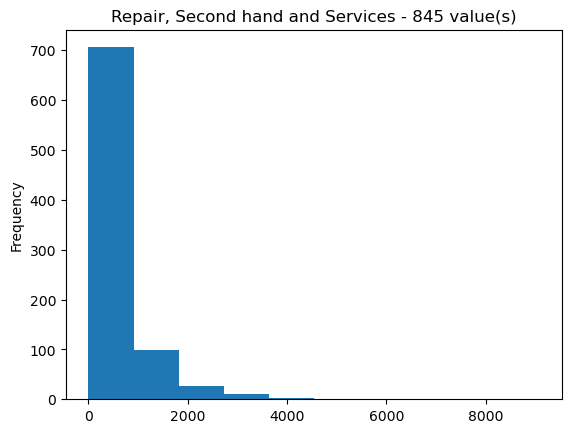

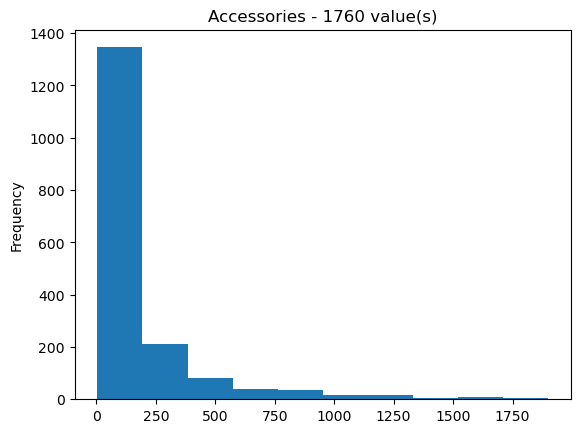

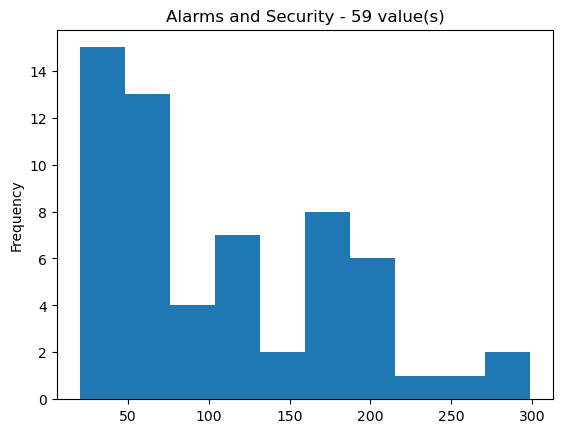

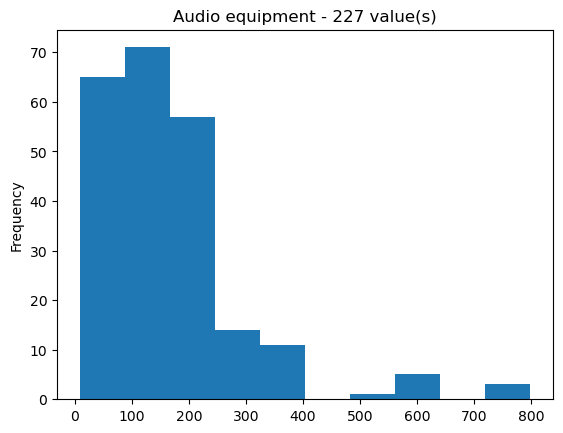

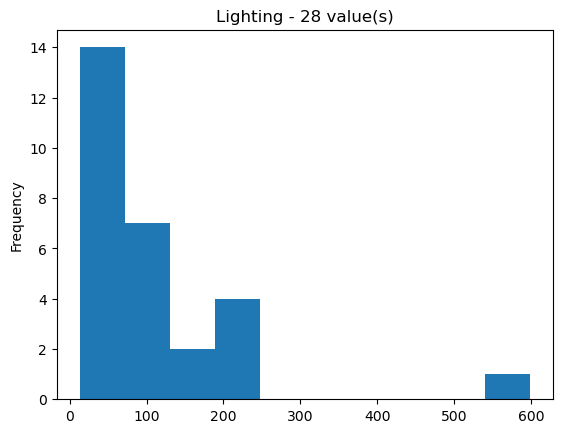

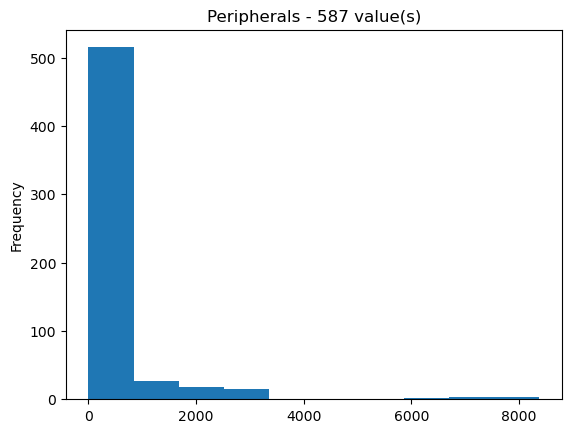

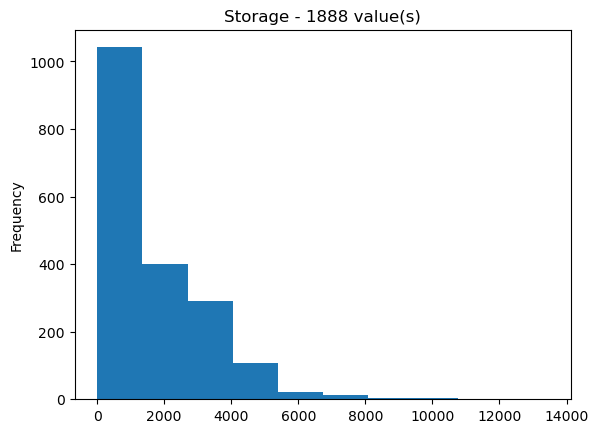

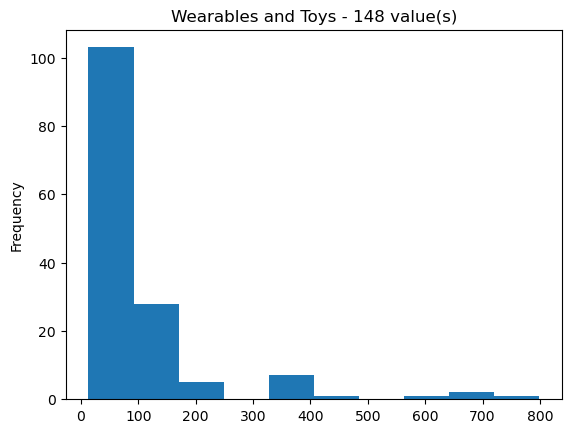

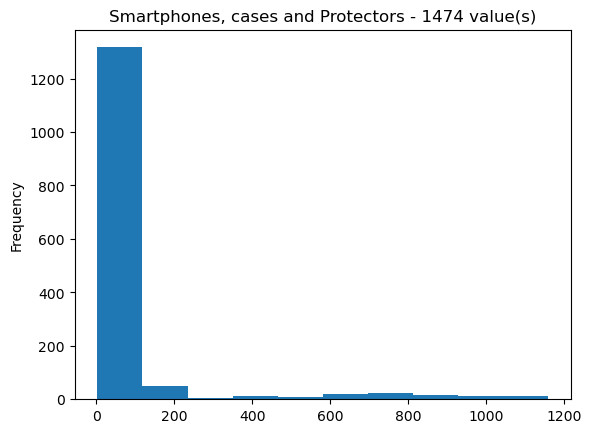

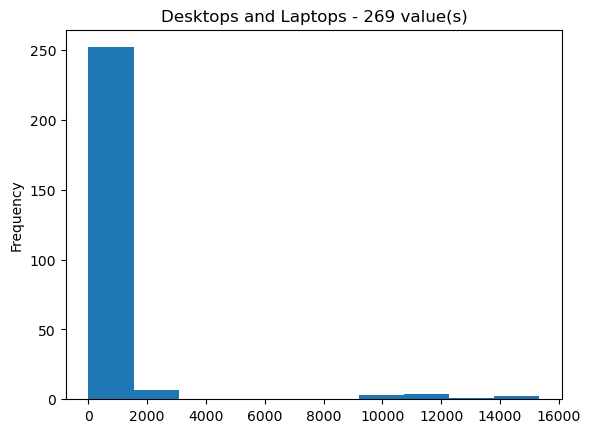

In [ ]:
# plot a histogram for each type
for cat in categories:
    data = products.loc[products.loc[:, 'category'] == cat, 'price'].reset_index()['price']
    data.plot(
        kind='hist',
        title=f'{cat} - {data.shape[0]} value(s)',
        bins=10
    )
    plt.show()

3. How many products are being discounted?

In [ ]:
orderlines_products = pd.merge(orderlines, products, how='inner', on='sku')
orderlines_products_orders = pd.merge(orderlines_products, orders, how='inner', on=['order_id'])
discounted = orderlines_products_orders.loc[orderlines_products_orders.loc[:, 'price'] < orderlines_products_orders.loc[:, 'unit_price'], ['sku', 'unit_price', 'price']]
percent    = 100*discounted["sku"].count()/orderlines_products_orders.shape[0]

print(f'{discounted["sku"].count()} products or {percent:.2f} %')

1676 products or 2.77 %




```
# This is formatted as code
```

4. How big are the offered discounts as a percentage of the product prices?

In [ ]:
discount_percentage = 100 * ((discounted.loc[:, 'unit_price'] - discounted.loc[:, 'price'])/discounted.loc[:,'price'])
print(discount_percentage)

92       6.429031
93       1.428673
102      1.428673
171      6.528190
303      0.267559
           ...   
59866    0.594258
59867    0.594258
59868    0.594258
59869    0.594258
60195    0.001570
Length: 1676, dtype: float64


5. How do seasonality and special dates (Christmas, Black Friday) affect sales?

min - 2017-03-04,
max - 2017-11-24


<Axes: xlabel='created_date'>

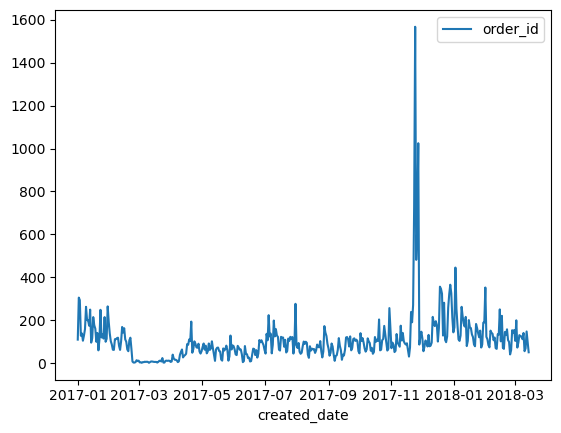

In [ ]:
orders_no_hours                 = orders.copy()
orders_no_hours['created_date'] = orders_no_hours['created_date'].dt.date

# filter for Completed orders
orders_no_hours = orders_no_hours.loc[orders_no_hours.loc[:, 'state'] == 'Completed']

grouped_by_months = orders_no_hours.groupby('created_date').agg({'order_id': 'count'})
print(f'min - {grouped_by_months.idxmin()[0]},\nmax - {grouped_by_months.idxmax()[0]}')
grouped_by_months.plot(kind='line', y='order_id')

# orders.resample('W', on='created_date').count()['order_id'].plot()

6. How could data collection be improved?

7. How many orders are there?

In [ ]:
print(orders.loc[:, 'order_id'].nunique())

46560


8. How many products are there?

In [ ]:
print(products.loc[:, 'sku'].nunique())

7464


9. What period of time do these orders comprise?

In [ ]:
min_date = orders.loc[:, 'created_date'].min()
max_date = orders.loc[:, 'created_date'].max()
date_diff = max_date - min_date
print(f'{date_diff.days} days')

437 days


10. How many orders are Completed?

In [ ]:
print(orders.loc[orders.loc[:, 'state'] == 'Completed', :]['order_id'].count())

46560


11. How should revenue be computed?

In [ ]:
# orders*price